In [1]:
import numpy as np
import os


In [2]:
import tensorflow as tf
devices = tf.config.experimental.list_physical_devices()
print(devices)
tf.config.experimental.set_memory_growth(devices[1],True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Rename Images
"""
I use to this dataset " https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset "
"""

In [3]:
import random
import glob
import shutil

In [4]:
os.chdir("Cats and Dogs Exercise/data")

if os.path.isdir("train/dog") is False :
    
    os.makedirs("train/dog")
    os.makedirs("train/cat")
    os.makedirs("valid/dog")
    os.makedirs("valid/cat")
    os.makedirs("test/dog")
    os.makedirs("test/cat")

    for c in random.sample(glob.glob("cat*"),1000):
        shutil.move(c,"train/cat")
    for c in random.sample(glob.glob("dog*"),1000):
        shutil.move(c,"train/dog")
    for c in random.sample(glob.glob("cat*"),200):
        shutil.move(c,"valid/cat")
    for c in random.sample(glob.glob("dog*"),200):
        shutil.move(c,"valid/dog")
    for c in random.sample(glob.glob("cat*"),100):
        shutil.move(c,"test/cat")
    for c in random.sample(glob.glob("dog*"),100):
        shutil.move(c,"test/dog")
    
os.chdir("../../")

In [5]:
train_path ="Cats and Dogs Exercise\data\\train"
test_path ="Cats and Dogs Exercise\data\\test"
valid_path ="Cats and Dogs Exercise\data\\valid"

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=["cat","dog"],batch_size=20)
test_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=False)
valid_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),classes=["cat","dog"],batch_size=20)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
assert train_batchs.n == 2000
assert valid_batchs.n == 400
assert test_batchs.n == 200
assert train_batchs.num_classes == valid_batchs.num_classes == test_batchs.num_classes == 2

In [8]:
imgs,labels = next(train_batchs)
imgs,labels

(array([[[[-4.3939003e+01, -6.7789993e+00,  9.3199997e+00],
          [-5.6939003e+01, -1.9778999e+01, -3.6800003e+00],
          [-6.9939003e+01, -3.6778999e+01, -1.9680000e+01],
          ...,
          [ 1.0306100e+02,  7.8221001e+01,  7.1320000e+01],
          [ 1.0506100e+02,  7.6221001e+01,  5.6320000e+01],
          [ 1.0206100e+02,  7.3221001e+01,  5.3320000e+01]],
 
         [[-5.0939003e+01, -1.4778999e+01,  4.3199997e+00],
          [-6.7939003e+01, -3.3778999e+01, -1.3680000e+01],
          [-8.1939003e+01, -4.9778999e+01, -2.9680000e+01],
          ...,
          [ 1.0606100e+02,  8.3221001e+01,  7.6320000e+01],
          [ 1.0806100e+02,  8.1221001e+01,  6.2320000e+01],
          [ 1.0606100e+02,  7.9221001e+01,  6.0320000e+01]],
 
         [[-5.7939003e+01, -2.3778999e+01, -3.6800003e+00],
          [-7.5939003e+01, -4.3778999e+01, -2.3680000e+01],
          [-8.5939003e+01, -5.5778999e+01, -3.5680000e+01],
          ...,
          [ 1.0106100e+02,  8.0221001e+01,  7.332

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

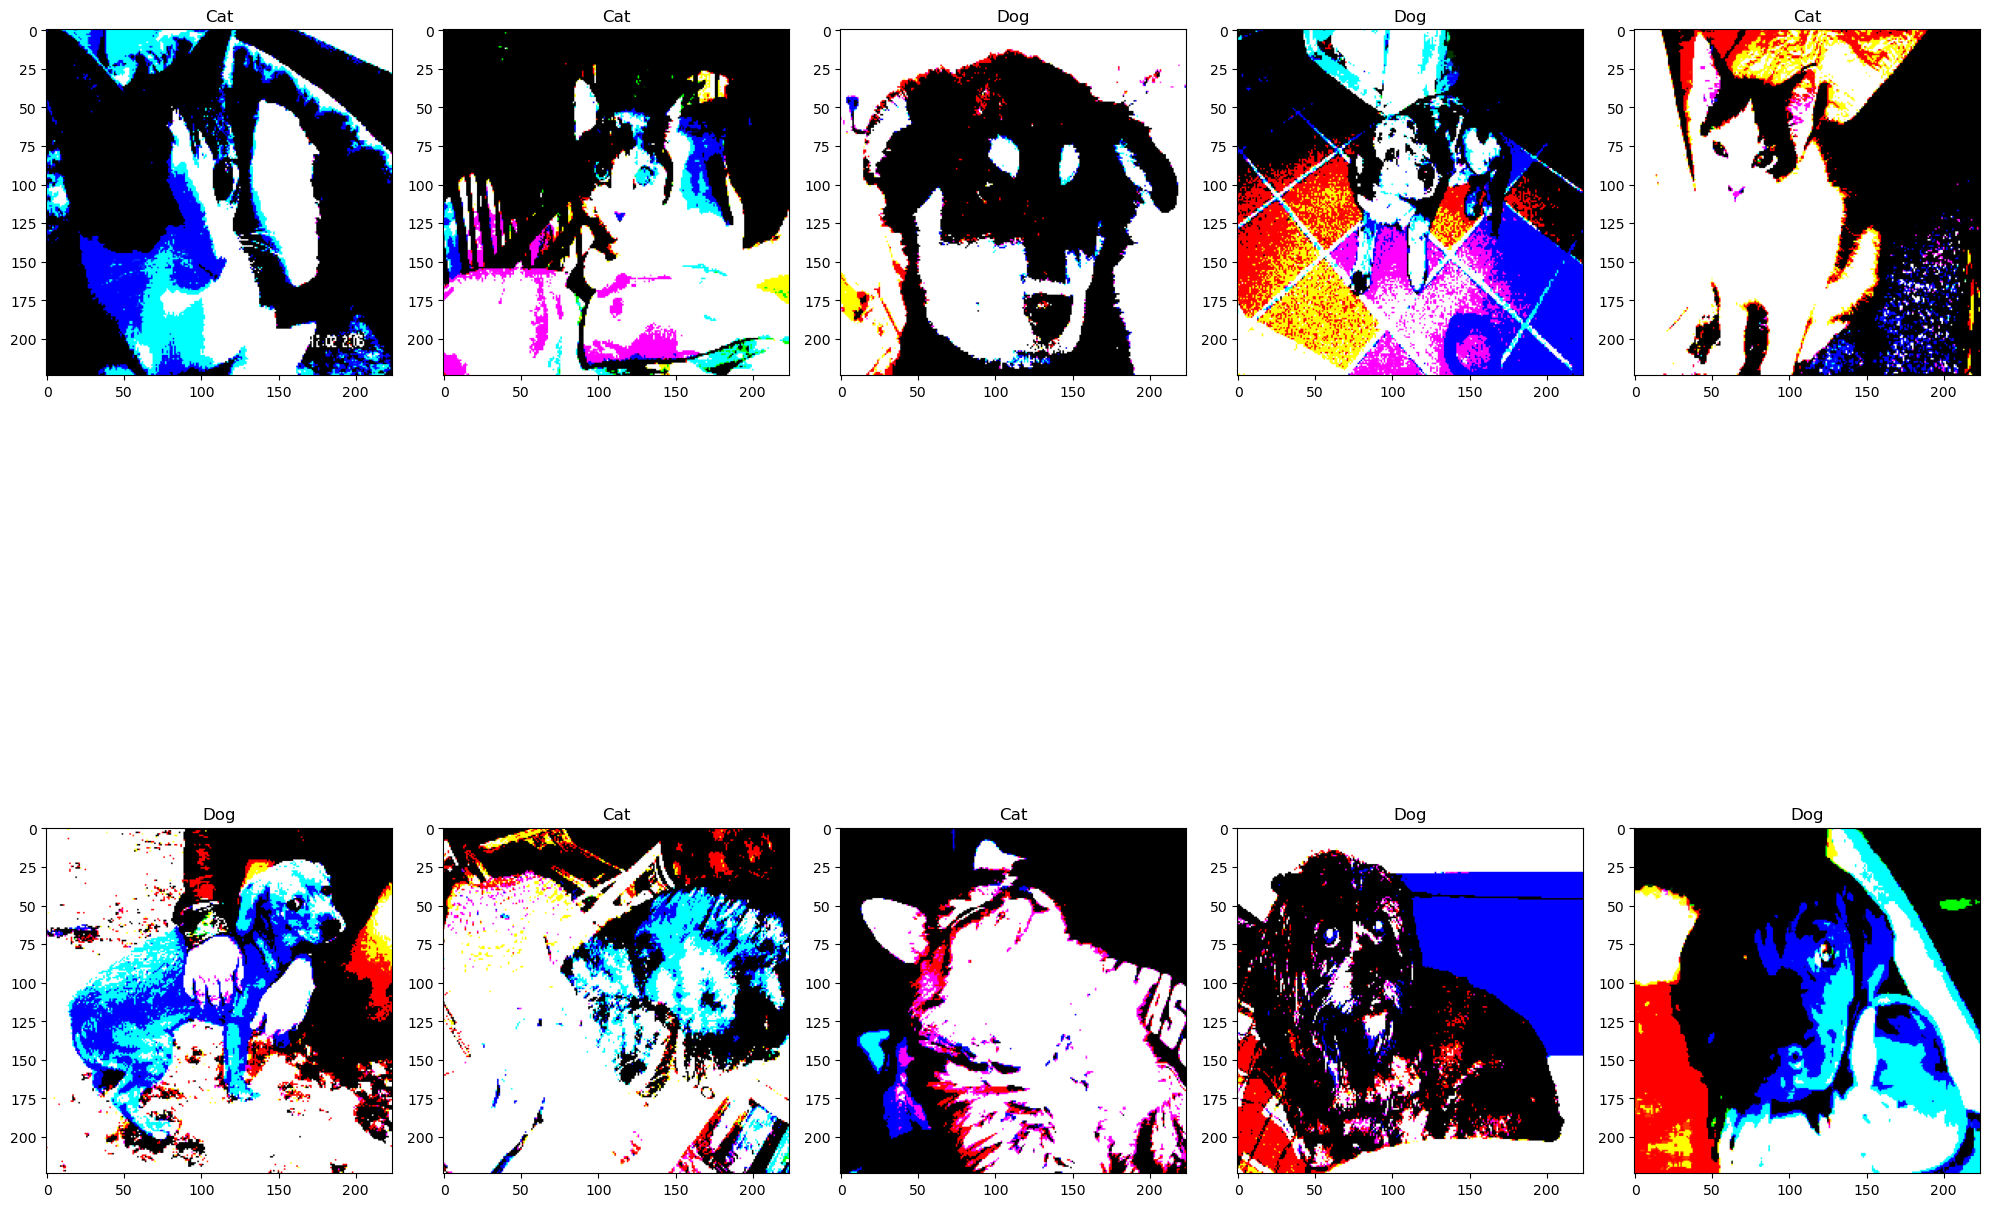

In [9]:
from matplotlib import pyplot as plt
def plotImages(images,labels):
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
       
        axe.imshow(image)
        axe.set_title("Cat" if label[0]== 1 else "Dog")

    plt.tight_layout()
    plt.show()
    
    
plotImages(imgs,labels)

Create Model

In [10]:
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam

In [11]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=2,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=["accuracy"])

In [14]:
model.fit(x=train_batchs,validation_data=valid_batchs,epochs=50,verbose=2)

Epoch 1/50
100/100 - 11s - loss: 25.8427 - accuracy: 0.5480 - val_loss: 12.5486 - val_accuracy: 0.5475 - 11s/epoch - 112ms/step
Epoch 2/50
100/100 - 7s - loss: 7.9305 - accuracy: 0.6325 - val_loss: 3.0132 - val_accuracy: 0.6000 - 7s/epoch - 74ms/step
Epoch 3/50
100/100 - 8s - loss: 3.2559 - accuracy: 0.6985 - val_loss: 2.2412 - val_accuracy: 0.6200 - 8s/epoch - 76ms/step
Epoch 4/50
100/100 - 8s - loss: 2.1293 - accuracy: 0.7390 - val_loss: 1.7172 - val_accuracy: 0.6125 - 8s/epoch - 76ms/step
Epoch 5/50
100/100 - 7s - loss: 1.6118 - accuracy: 0.7930 - val_loss: 1.5072 - val_accuracy: 0.6200 - 7s/epoch - 75ms/step
Epoch 6/50
100/100 - 8s - loss: 0.9415 - accuracy: 0.8395 - val_loss: 1.3086 - val_accuracy: 0.6250 - 8s/epoch - 81ms/step
Epoch 7/50
100/100 - 7s - loss: 0.7924 - accuracy: 0.8425 - val_loss: 1.2943 - val_accuracy: 0.6425 - 7s/epoch - 74ms/step
Epoch 8/50
100/100 - 7s - loss: 0.5964 - accuracy: 0.8780 - val_loss: 1.3250 - val_accuracy: 0.6050 - 7s/epoch - 74ms/step
Epoch 9/50


In [15]:
output = model.predict(x=test_batchs,verbose=0)
output

array([[9.9999893e-01, 1.0895976e-06],
       [9.9600595e-01, 3.9940230e-03],
       [9.6433121e-01, 3.5668857e-02],
       [9.9938011e-01, 6.1981025e-04],
       [2.2949933e-01, 7.7050066e-01],
       [7.1328592e-01, 2.8671408e-01],
       [4.9093109e-01, 5.0906891e-01],
       [9.9827754e-01, 1.7225131e-03],
       [9.1453272e-01, 8.5467309e-02],
       [9.3521422e-01, 6.4785816e-02],
       [2.1595681e-04, 9.9978405e-01],
       [1.0000000e+00, 2.4916602e-10],
       [4.3975296e-03, 9.9560249e-01],
       [7.9998237e-01, 2.0001765e-01],
       [2.1418042e-02, 9.7858196e-01],
       [1.9552548e-01, 8.0447447e-01],
       [7.4816680e-01, 2.5183317e-01],
       [5.0953120e-01, 4.9046883e-01],
       [5.2755886e-01, 4.7244117e-01],
       [9.2059202e-02, 9.0794075e-01],
       [2.9347223e-01, 7.0652771e-01],
       [9.5105463e-01, 4.8945405e-02],
       [5.5861428e-02, 9.4413859e-01],
       [9.9505335e-01, 4.9466952e-03],
       [1.0000000e+00, 2.6675091e-09],
       [2.7613371e-05, 9.

In [16]:
predict_labels = np.argmax(output,axis=1)

In [17]:
predict_labels

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [18]:
true_labels = np.where(predict_labels == test_batchs.classes)

print((len(true_labels[0])/len(test_batchs.classes)))

0.68


In [19]:
imgs,labels = next(test_batchs)
print(imgs.shape)
print(predict_labels.shape)
print(labels.shape)

(20, 224, 224, 3)
(200,)
(20, 2)


In [57]:
def plotPredictedImages(images,labels):
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
        
        axe.imshow(image)
        axe.set_title("Cat" if label== 0 else "Dog")

    plt.tight_layout()
    plt.show()
    
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

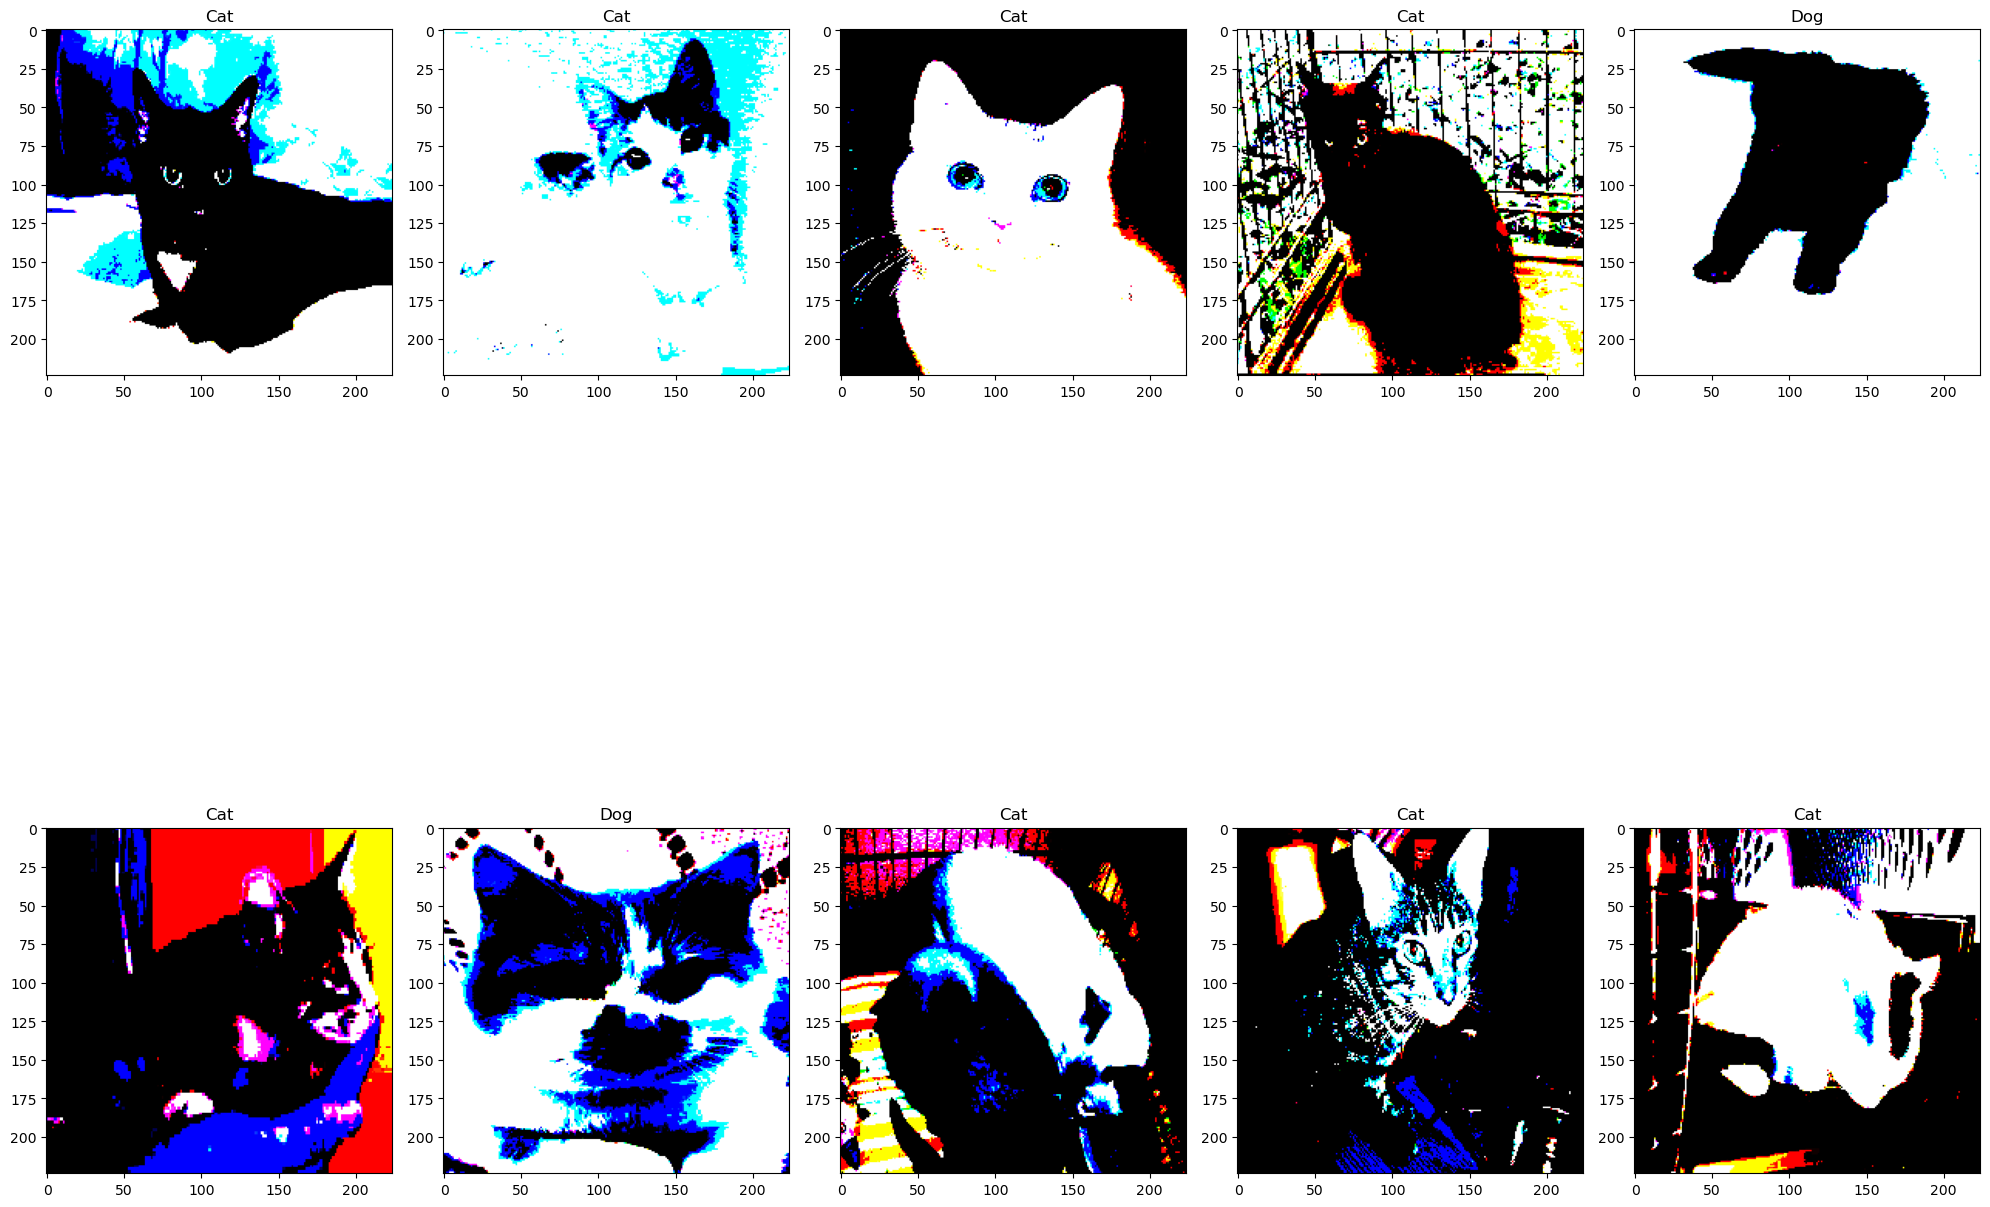

In [58]:
plotPredictedImages(imgs,predict_labels)

In [22]:
import os 
os.chdir("Cats and Dogs Exercise")
if os.path.isdir("model/model.h5") is False:
    model.save("model/model.h5")


In [23]:
os.chdir("../../")

In [24]:
## Confusion matrix

In [25]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [26]:
cm = confusion_matrix(test_batchs.classes,predict_labels)

In [27]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [28]:
test_batchs.class_indices

{'cat': 0, 'dog': 1}

[[65 35]
 [29 71]]


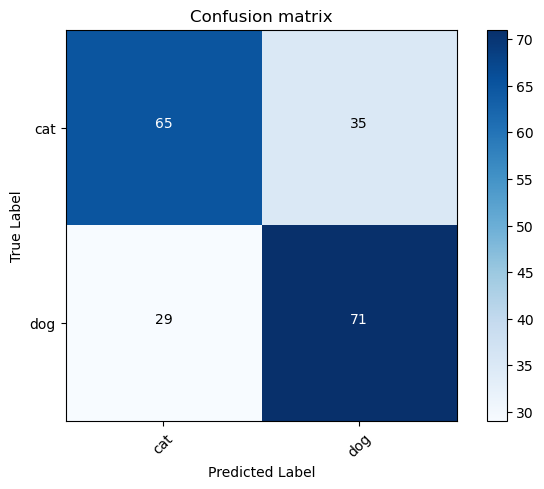

In [29]:
cm_plot_labels = ["cat","dog"]
plot_confusion_matrix(cm,cm_plot_labels)

In [30]:
del model

VGG16 Model

In [31]:
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.applications.vgg16 import VGG16

In [32]:
vgg16 = VGG16()

In [33]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
vgg16_model =  Sequential()

for layer in vgg16.layers[:-1]:
    vgg16_model.add(layer)

for layer in vgg16_model.layers:
    layer.trainable = False

In [35]:
vgg16_model.add(Dense(units=2,activation="softmax"))

In [36]:
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [37]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=["accuracy"])

VGG16 Model Train

In [38]:
train_path ="Cats and Dogs Exercise\data\\train"
test_path ="Cats and Dogs Exercise\data\\test"
valid_path ="Cats and Dogs Exercise\data\\valid"

In [39]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=["cat","dog"],batch_size=20)
test_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=["cat","dog"],batch_size=20,shuffle=False)
valid_batchs = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),classes=["cat","dog"],batch_size=20)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [40]:
vgg16_model.fit(x=train_batchs,validation_data=valid_batchs,epochs=5,verbose=2)

Epoch 1/5
100/100 - 26s - loss: 0.2483 - accuracy: 0.8985 - val_loss: 0.1487 - val_accuracy: 0.9525 - 26s/epoch - 256ms/step
Epoch 2/5
100/100 - 23s - loss: 0.0804 - accuracy: 0.9710 - val_loss: 0.1170 - val_accuracy: 0.9650 - 23s/epoch - 230ms/step
Epoch 3/5
100/100 - 23s - loss: 0.0584 - accuracy: 0.9805 - val_loss: 0.0859 - val_accuracy: 0.9625 - 23s/epoch - 230ms/step
Epoch 4/5
100/100 - 23s - loss: 0.0459 - accuracy: 0.9835 - val_loss: 0.0856 - val_accuracy: 0.9700 - 23s/epoch - 235ms/step
Epoch 5/5
100/100 - 23s - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0798 - val_accuracy: 0.9725 - 23s/epoch - 231ms/step


Predict VGG16 Model

In [41]:
output_vgg16 = vgg16_model.predict(x=test_batchs,verbose=0)
output_vgg16

array([[9.90872204e-01, 9.12784599e-03],
       [9.98691976e-01, 1.30805490e-03],
       [9.98441994e-01, 1.55797740e-03],
       [9.99994397e-01, 5.57252724e-06],
       [9.97750700e-01, 2.24930095e-03],
       [9.99984384e-01, 1.56082297e-05],
       [9.99972224e-01, 2.78080806e-05],
       [9.99991179e-01, 8.77648381e-06],
       [9.99701083e-01, 2.98840372e-04],
       [1.00000000e+00, 1.77207795e-08],
       [9.99958873e-01, 4.11557266e-05],
       [9.99785960e-01, 2.14027488e-04],
       [9.99241352e-01, 7.58616545e-04],
       [9.99852657e-01, 1.47317231e-04],
       [9.98063982e-01, 1.93597574e-03],
       [9.99863863e-01, 1.36153263e-04],
       [8.43259335e-01, 1.56740695e-01],
       [9.99994874e-01, 5.10236850e-06],
       [9.99823868e-01, 1.76180649e-04],
       [9.99928594e-01, 7.14248672e-05],
       [9.99406695e-01, 5.93340141e-04],
       [9.99392033e-01, 6.07967842e-04],
       [9.99820054e-01, 1.79990078e-04],
       [9.99291658e-01, 7.08287291e-04],
       [9.921305

In [49]:
predict_labels_vgg16 = np.argmax(output_vgg16,axis=1)
predict_labels_vgg16

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [50]:
true_labels_vgg16 = np.where(predict_labels_vgg16 == test_batchs.classes)

print((len(true_labels_vgg16[0])/len(test_batchs.classes)))

0.975


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

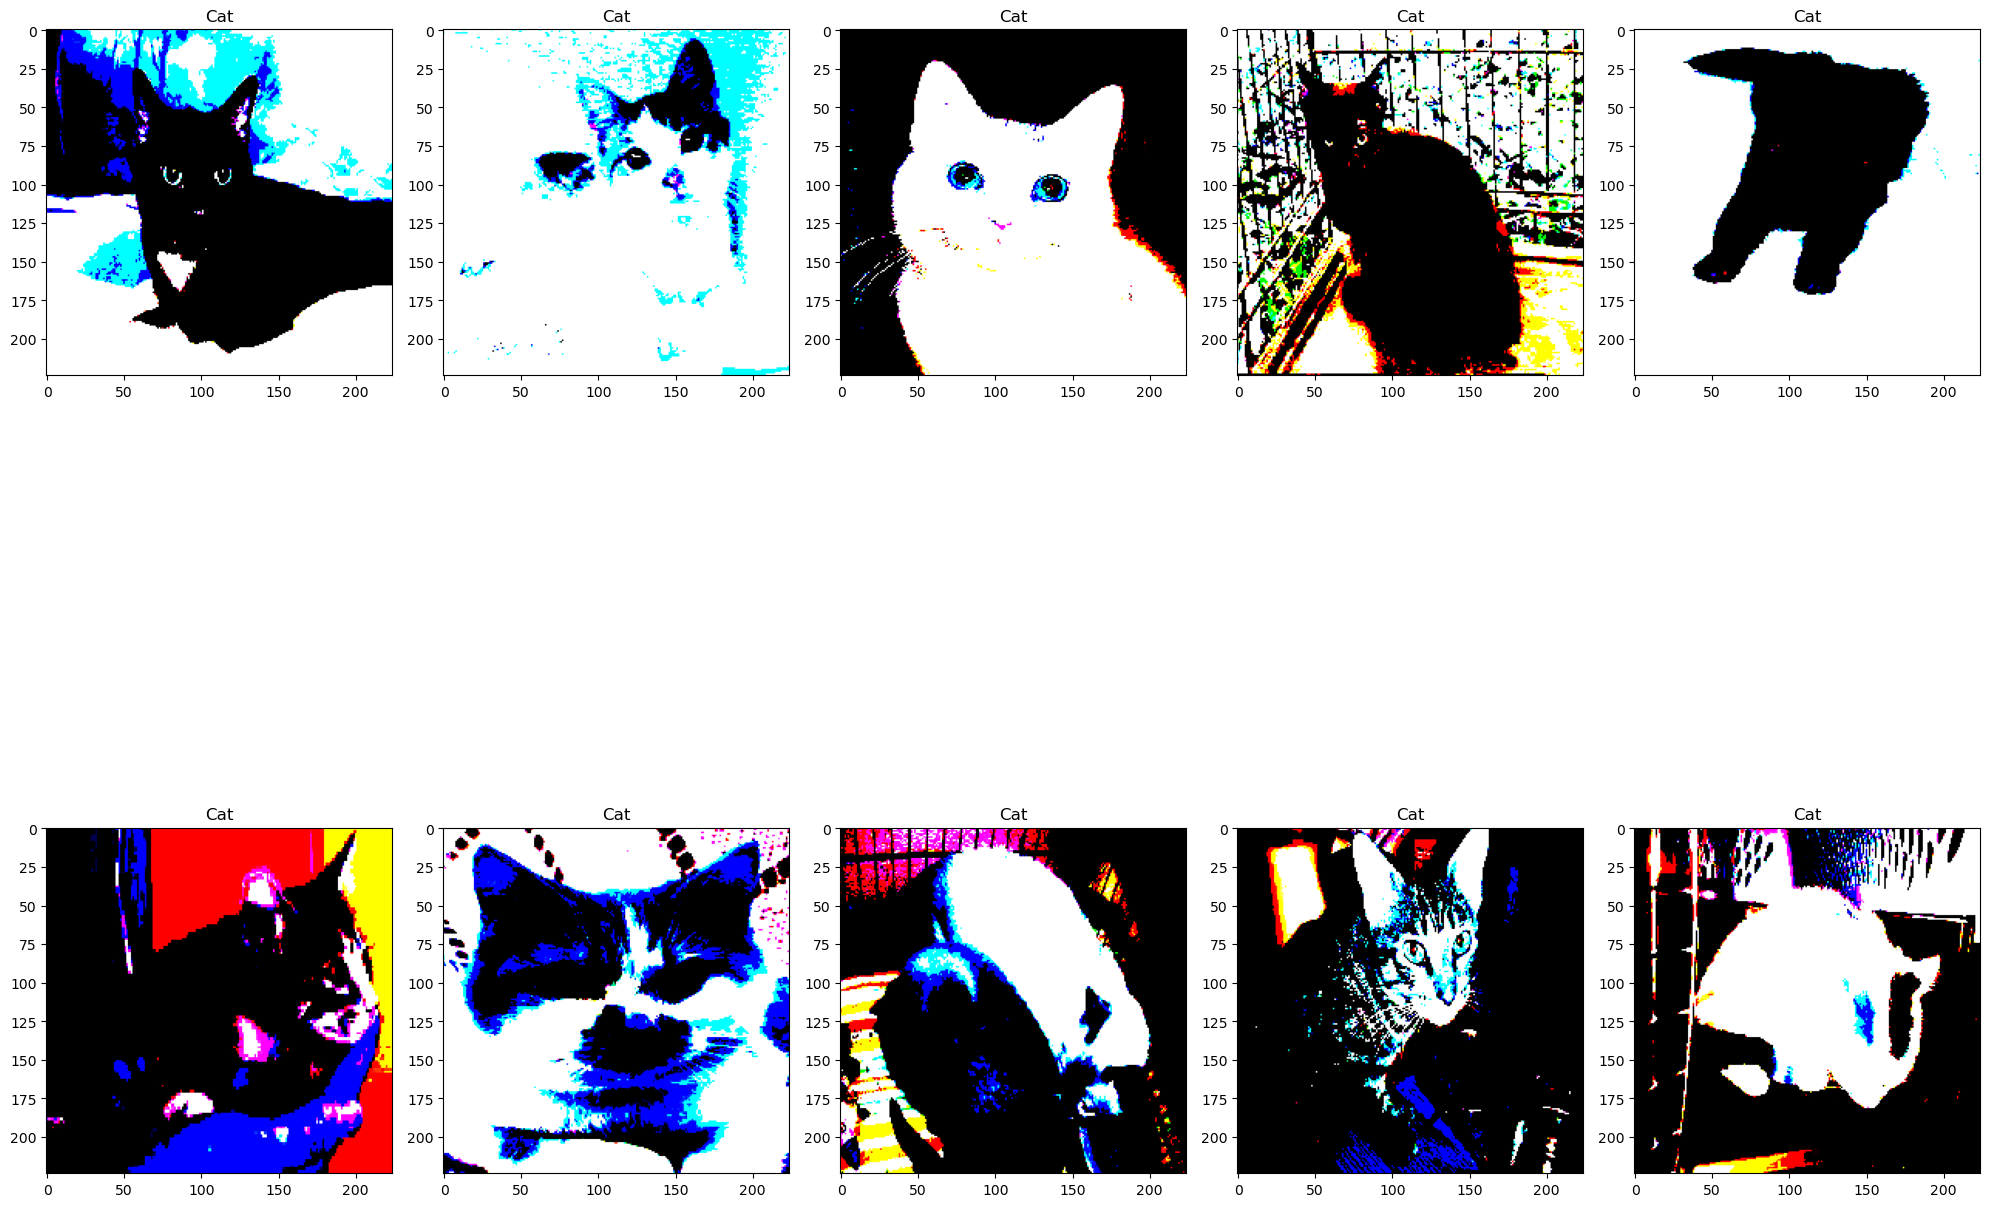

In [52]:

def plotPredictedImages(images,labels):
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
        
        axe.imshow(image)
        axe.set_title("Cat" if label== 0 else "Dog")

    plt.tight_layout()
    plt.show()
    
    

plotPredictedImages(imgs,predict_labels_vgg16)

In [53]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [54]:
cm = confusion_matrix(test_batchs.classes,predict_labels_vgg16)

In [55]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

[[98  2]
 [ 3 97]]


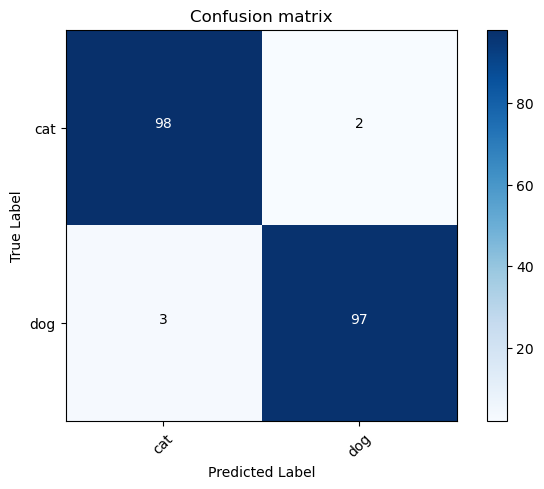

In [56]:
cm_plot_labels = ["cat","dog"]
plot_confusion_matrix(cm,cm_plot_labels)